# Show non-decoupling effects for various aligned BSM models

In [1]:
from anyBSM.plotting import ScanParameter, Plotting, setAnyStyle
import anyBSM.plotting as plotting# adds watermarks
plotting.anyLogo = {'resize': 1.5, 'show': False, 'alpha': 0.4, 'zorder': 0, 'loc': 'lower right'}
from anyBSM import anyBSM
import numpy as np
import math
from cmath import sqrt
import matplotlib
import matplotlib.pyplot as plt
setAnyStyle()

# Obtain $\kappa_\lambda$ in the SM for normalization/comparison

In [2]:
# mass range to plot
global Mval, Msmall
Mval = np.linspace(start=300, stop=1000, num=100)
# Mass value of lightest SU(2) state 
Msmall = 400

def plot(lamval,a005,a01, label):
    fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(7,5))
    plt.plot(Mval,lamval,c='blue', ls = '--', alpha=0.6)
    plt.plot(Mval[a01],lamval[a01],c='blue', ls = '--')
    plt.plot(Mval[a005],lamval[a005],c='blue', label=label)
    ax.axhline(y=6.3, xmin=0,xmax=2500,color='red',lw=2,label='ATLAS-CONF-2022-050')
    ax.set_ylim(0,7)
    ax.axhline(y=kappaSM,color='black',lw=2,ls='-',label=r'SM')
    ax.legend(fontsize=16)
    ax.set_xlabel(r'$M_\mathrm{BSM}$ [GeV]',fontsize=18)
    ax.set_ylabel(r'$\kappa_{\lambda}$',fontsize=18)
    ax.set_xlim(min(Mval),max(Mval))

In [3]:
# initialise the SM in OS scheme
SM = anyBSM('SM', quiet = True)
lamSM=SM.lambdahhh()
norm=lamSM['treelevel'].real
kappaSM=lamSM['total'].real/norm

## 2HDM-II

In [4]:
# initialise the 2HDM in the OS scheme
THDM = anyBSM('THDMII', scheme_name = "OSalignment", progress = False, quiet = True)
THDM.warnSSSS = False
THDM.setparameters({'TanBeta': 2, 'SinBmA': 1})
THDMval = np.array([ THDM.lambdahhh(parameters={'Mh2': Msmall, 'MAh2':MPhi,'MHm2':MPhi,'M': Msmall})['total'].real/norm for MPhi in Mval])
a0THDM  = np.array([ THDM.eigSSSS(  parameters={'Mh2': Msmall, 'MAh2':MPhi,'MHm2':MPhi,'M': Msmall}) for MPhi in Mval])
a0THDM05 = a0THDM < 0.5
a0THDM1 = a0THDM < 1

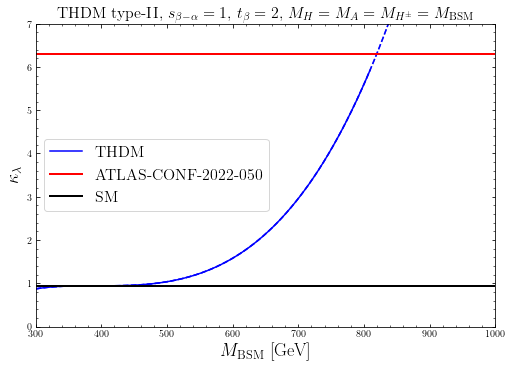

In [5]:
plot(THDMval,a0THDM05,a0THDM1,'THDM')
plt.title(r'THDM type-II, $s_{\beta-\alpha}=1$, $t_\beta=2$, $M_H=M_A=M_{H^\pm}=M_\mathrm{BSM}$',fontsize=16);

## Complex triplet extension (Y=1)

In [6]:
# initialise the TSM in the OS scheme
TSM = anyBSM('TSM_Yeq1',quiet=True,progress=False,ask=False)
TSM.warnSSSS = False
TSM.setparameters({'lam4': 1.5})
TSMval = np.array([TSM.lambdahhh(parameters={'MDPP': Msmall, 'MDP': M})['total'].real/norm for M in Mval])
a0TSM  = np.array([TSM.eigSSSS(  parameters={'MDPP': Msmall, 'MDP': M}) for M in Mval])
a0TSM05 = a0TSM < 0.5
a0TSM1 = a0TSM < 1.0

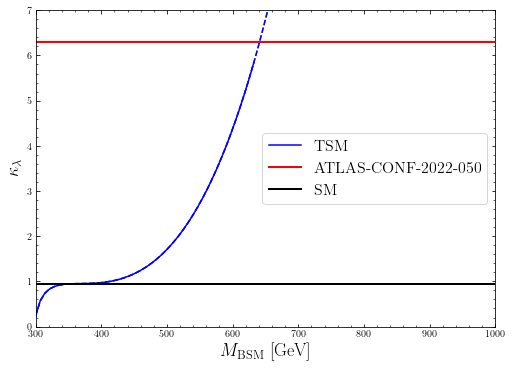

In [7]:
plot(TSMval, a0TSM05, a0TSM1, 'TSM')

## Inert Doublet Model (IDM)

In [8]:
# initialise the 2HDM in the OS scheme
IDM = anyBSM('IDM', progress = False, quiet = True)
IDM.setparameters({'Lam2': 1})
IDM.warnSSSS = False
IDMval = np.array([ IDM.lambdahhh(parameters={'Mh2': Msmall, 'MAh2':MPhi,'MHm2':MPhi,'mHu2': Msmall**2})['total'].real/norm for MPhi in Mval])
a0IDM =  np.array([ IDM.eigSSSS(  parameters={'Mh2': Msmall, 'MAh2':MPhi,'MHm2':MPhi,'mHu2': Msmall**2}) for MPhi in Mval])
a0IDM05 = a0IDM < 0.5
a0IDM1 = a0IDM < 1.0

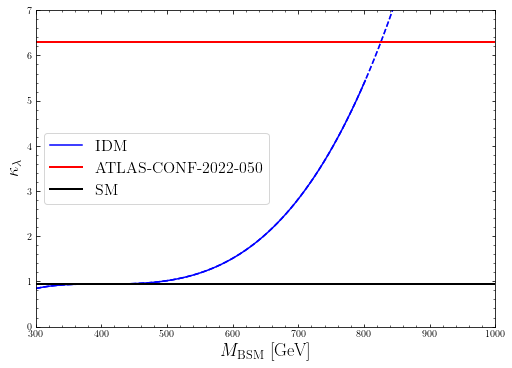

In [9]:
plot(IDMval, a0IDM05, a0IDM1, 'IDM')

## Georgi-Machacek (GM)

In [10]:
# initialise the GM in the OS scheme
GM = anyBSM('GeorgiMachacekAligned',quiet=True,progress=False,ask=False,scheme_name="OStadpoles")
GM.warnSSSS=False
GM.setparameters({'Lam3': -0.1,'Lam4':0.1})
GMval = np.array([ GM.lambdahhh(parameters={'Mh2': Msmall, 'Meta': Msmall,'M5':MPhi})['total'].real/norm for MPhi in Mval])
a0GM =  np.array([ GM.eigSSSS(parameters={'Mh2': Msmall, 'Meta': Msmall,'M5':MPhi}) for MPhi in Mval])
a0GM05 = a0GM < 0.5
a0GM1 = a0GM < 1.0

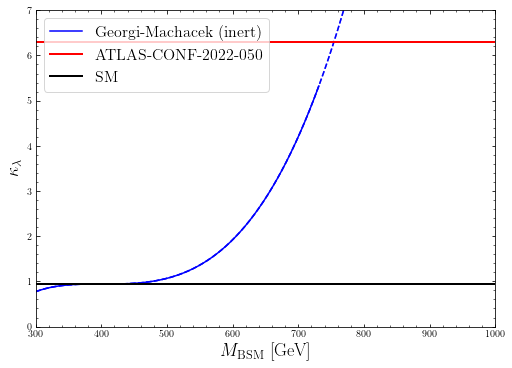

In [11]:
plot(GMval, a0GM05, a0GM1, 'Georgi-Machacek (inert)')

## Combine all plots

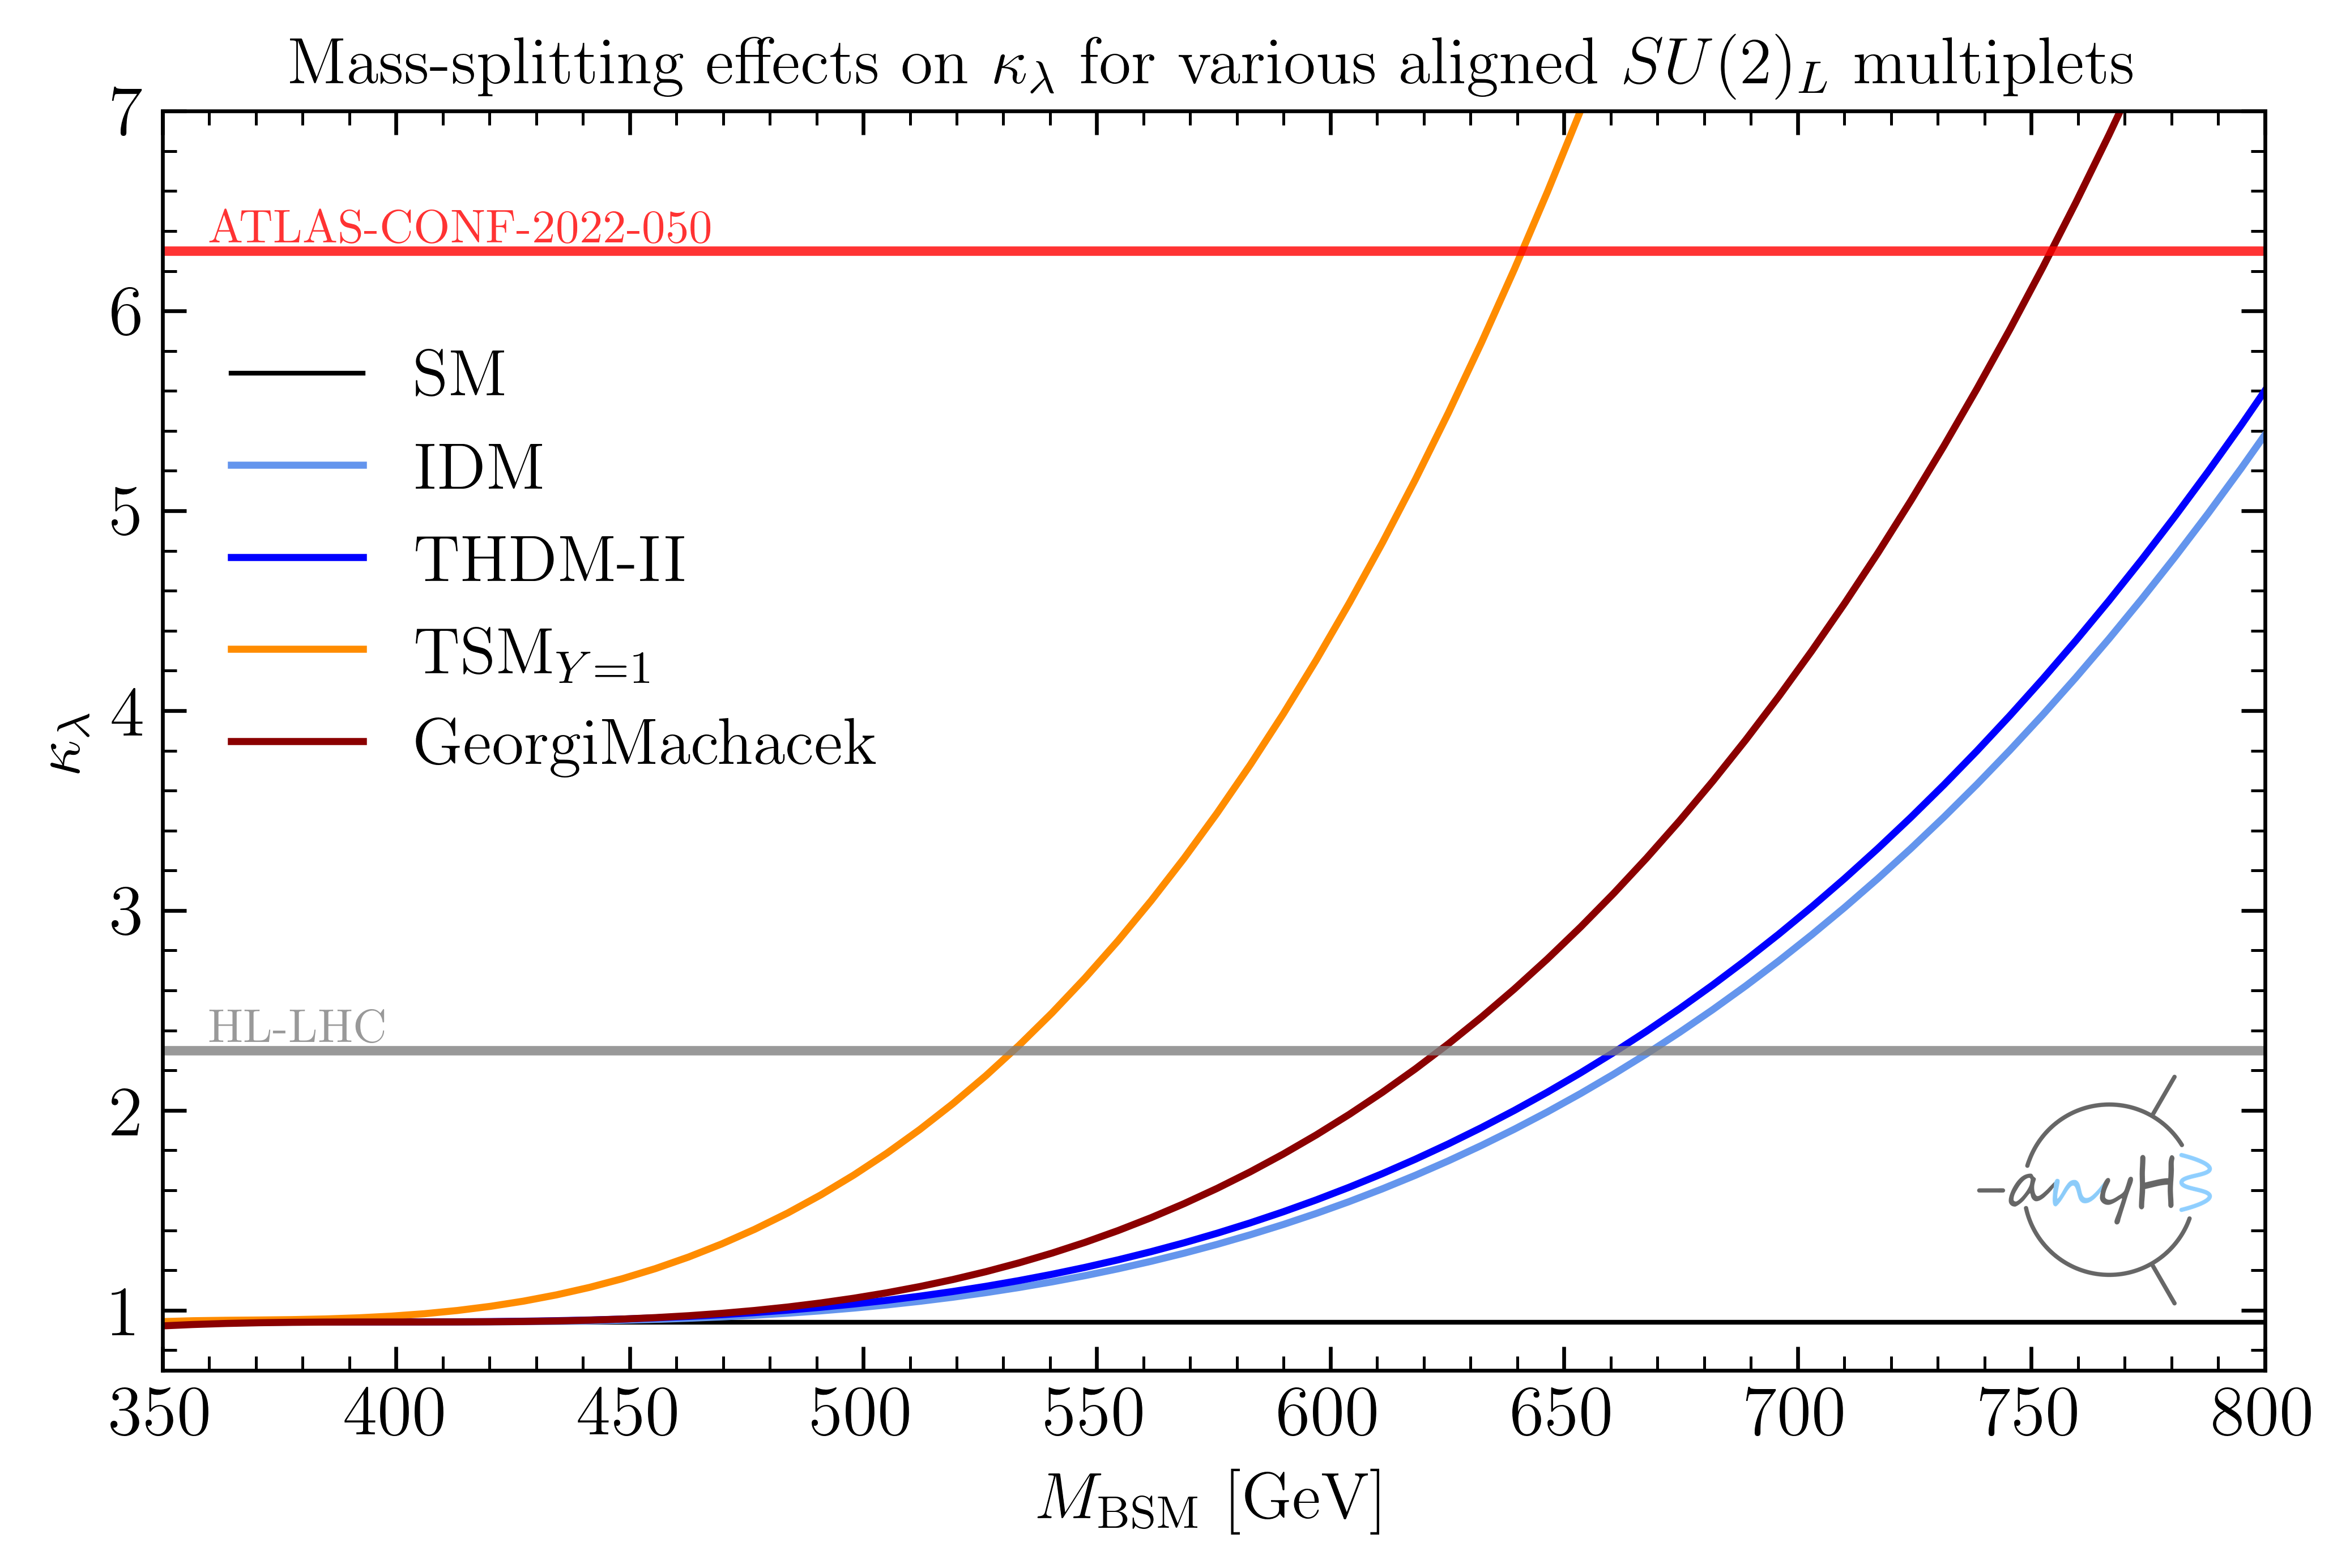

In [17]:
# all at once
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(6.8,4.5))
fig.dpi=600
ax.axhline(y=kappaSM, xmin=0,xmax=2500,color='black',lw=1,ls='-',label=r'SM')
plt.plot(Mval,IDMval,  '-',  c='cornflowerblue',   label=r'IDM') #, $\sqrt{M_{\mathrm{BSM}}^2-\mu_2^2}=250$ GeV, $\lambda_2 = 2$')
plt.plot(Mval,THDMval,  '-', c='blue',   label=r'THDM-II') #, $\sqrt{M_{\mathrm{BSM}}^2-M^2}=250$ GeV, $\tan\beta=2,\,\sin(\beta-\alpha)=1$')
plt.plot(Mval,TSMval,        c='darkorange', label=r'TSM$_{Y=1}$') # , $v_T=0$, $\lambda_4=2.5$')
plt.plot(Mval,GMval,         c='darkred', label=r'GeorgiMachacek') #, $\sqrt{M_{\mathrm{BSM}}^2-M_\eta^2}=250$ GeV, $M_5=M_3=M_{\mathrm{BSM}}$, $\sin(H)=0$')
plt.text(360,6.34, 'ATLAS-CONF-2022-050', color='red', alpha=0.8)
ax.axhline(y=6.3,color='red',lw=2,ls='-', alpha=0.8)
plt.text(360,2.34, 'HL-LHC', color='grey', alpha=0.8)
ax.axhline(y=2.3, color='grey',lw=2,ls='-', alpha=0.8)
ax.set_xlim(350,800)
ax.set_ylim(0.7,7)
ax.legend(loc=(0.02,0.45),fontsize=14,frameon=False)
ax.set_ylabel(r'$\kappa_\lambda$',fontsize=14)
ax.set_xlabel(r'$M_\mathrm{BSM}$ [GeV]',fontsize=14)
# ax.set_xticks([350, , 750, 1000, 1250, 850],labels=[0.25, 0.5, 0.75, 1.0, 1.25, 0.85])
ax.set_title(r'Mass-splitting effects on $\kappa_\lambda$ for various aligned $SU(2)_L$ multiplets',fontsize=14)
ax.tick_params(axis='both', which='major', length=5, labelsize=15)
ax.tick_params(axis='both', which='minor', length=3, labelsize=15)

plotting.place_logo(fig,0.85,0.16, resize=0.3, alpha=0.6, logo_name='anyH3_logo_large.png')

plt.savefig('AnyNonDecoupling.pdf', bbox_inches="tight",dpi=fig.dpi)
#plt.show()

## Combined plots with unitarity

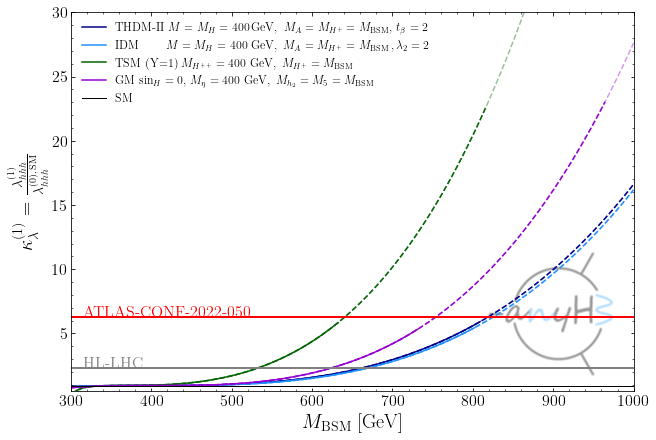

In [27]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(9,6))

plt.plot(Mval, THDMval, c='darkblue', ls ='--', alpha=0.4)
plt.plot(Mval[a0THDM1], THDMval[a0THDM1], c='darkblue', ls = '--')
plt.plot(Mval[a0THDM05], THDMval[a0THDM05],   c='darkblue', ls = '-', label=r'THDM-II  $M=M_H=400\,$GeV, $\, M_A=M_{H^+}=M_{\mathrm{BSM}},\, t_\beta=2$')


plt.plot(Mval,IDMval,  c='dodgerblue', ls='--', alpha=0.4)
plt.plot(Mval[a0IDM1], IDMval[a0IDM1], c='dodgerblue', ls = '--')
plt.plot(Mval[a0IDM05], IDMval[a0IDM05],   c='dodgerblue', ls = '-', label='IDM  $\quad\quad M=M_{H}=400$ GeV, $\, M_A=M_{H^+}=M_{\mathrm{BSM}}\,, \lambda_2=2$')


plt.plot(Mval, TSMval,  c='darkgreen', alpha=0.4, ls='--')
plt.plot(Mval[a0TSM1], TSMval[a0TSM1], c='darkgreen', ls = '--')
plt.plot(Mval[a0TSM05], TSMval[a0TSM05],   c='darkgreen', ls = '-', label = 'TSM (Y=1)  $M_{H^{++}}=400$ GeV, $\, M_{H^{+}}=M_{\mathrm{BSM}}$')


plt.plot(Mval,GMval,  c='darkviolet', alpha=0.4, ls='--')
plt.plot(Mval[a0GM1],GMval[a0GM1], c='darkviolet', ls = '--')
plt.plot(Mval[a0GM05], GMval[a0GM05],   c='darkviolet', ls = '-', label = 'GM $\sin_H=0,$ $M_{\eta}=400$ GeV, $\, M_{h_2}=M_5=M_{\mathrm{BSM}}$')

ax.axhline(y=kappaSM,xmin=0,xmax=2500,color='black',lw=1,ls='-',label=r'SM')
ax.legend(fontsize=12, loc='upper left', frameon=False)

ax.set_xlabel(r'$M_{\mathrm{BSM}}$ [GeV]',fontsize=20)
ax.set_ylabel(r'$\kappa^{(1)}_\lambda = \frac{\lambda_{hhh}^{(1)}}{\lambda_{hhh}^{(0),\, \mathrm{SM}}}$',fontsize=20)
plt.text(315,6.35, 'ATLAS-CONF-2022-050', color='red')
ax.axhline(y=6.3, color='red',lw=2,ls='-')
plt.text(315,2.34, 'HL-LHC', color='grey')
ax.axhline(y=2.3, color='grey',lw=2,ls='-')
ax.set_ylim(0.5,30)

ax.set_xlim(min(Mval),max(Mval))

plt.savefig('AnyNonDecoupling_Unitarity.pdf', bbox_inches="tight")

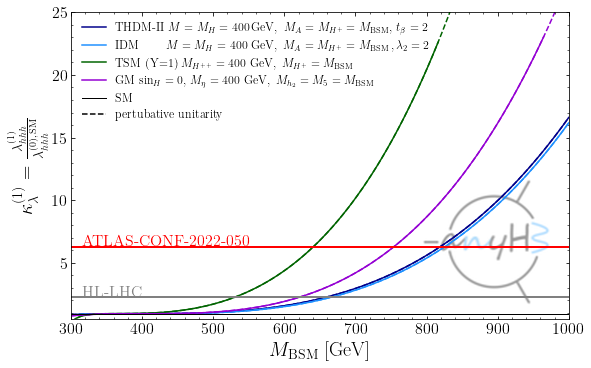

In [28]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=(8.1,5))

plt.plot(Mval, THDMval, c='darkblue', ls = '--')
plt.plot(Mval[a0THDM1],  THDMval[a0THDM1],  c='darkblue', ls = '-', label=r'THDM-II  $M=M_H=400\,$GeV, $\, M_A=M_{H^+}=M_{\mathrm{BSM}},\, t_\beta=2$')


plt.plot(Mval, IDMval, c='dodgerblue', ls = '--')
plt.plot(Mval[a0IDM1], IDMval[a0IDM1],   c='dodgerblue', ls = '-', label='IDM  $\quad\quad M=M_{H}=400$ GeV, $\, M_A=M_{H^+}=M_{\mathrm{BSM}}\,, \lambda_2=2$')


plt.plot(Mval, TSMval, c='darkgreen', ls = '--')
plt.plot(Mval[a0TSM1], TSMval[a0TSM1],   c='darkgreen', ls = '-', label = 'TSM (Y=1)  $M_{H^{++}}=400$ GeV, $\, M_{H^{+}}=M_{\mathrm{BSM}}$')


plt.plot(Mval,GMval, c='darkviolet', ls = '--')
plt.plot(Mval[a0GM1], GMval[a0GM1],   c='darkviolet', ls = '-', label = 'GM $\sin_H=0,$ $M_{\eta}=400$ GeV, $\, M_{h_2}=M_5=M_{\mathrm{BSM}}$')

ax.axhline(y=kappaSM,xmin=0,xmax=2500,color='black',lw=1,ls='-',label=r'SM')

plt.plot(np.NaN, np.NaN, color='k',ls='--', label='pertubative unitarity')

ax.legend(fontsize=12, loc='upper left', frameon=False)

ax.set_xlabel(r'$M_{\mathrm{BSM}}$ [GeV]',fontsize=20)
ax.set_ylabel(r'$\kappa^{(1)}_\lambda = \frac{\lambda_{hhh}^{(1)}}{\lambda_{hhh}^{(0),\, \mathrm{SM}}}$',fontsize=20)
plt.text(315,6.35, 'ATLAS-CONF-2022-050', color='red')
ax.axhline(y=6.3, color='red',lw=2,ls='-')
plt.text(315,2.34, 'HL-LHC', color='grey')
ax.axhline(y=2.3, color='grey',lw=2,ls='-')
ax.set_ylim(0.5,25)

ax.set_xlim(min(Mval),max(Mval))

plt.savefig('AnyNonDecoupling_Unitarity.pdf', bbox_inches="tight")